<a href="https://colab.research.google.com/github/hrs9616/Misc.-scripts/blob/main/CN%2B_GRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style='font-size:large'>GRM Analysis for CN\+</span>



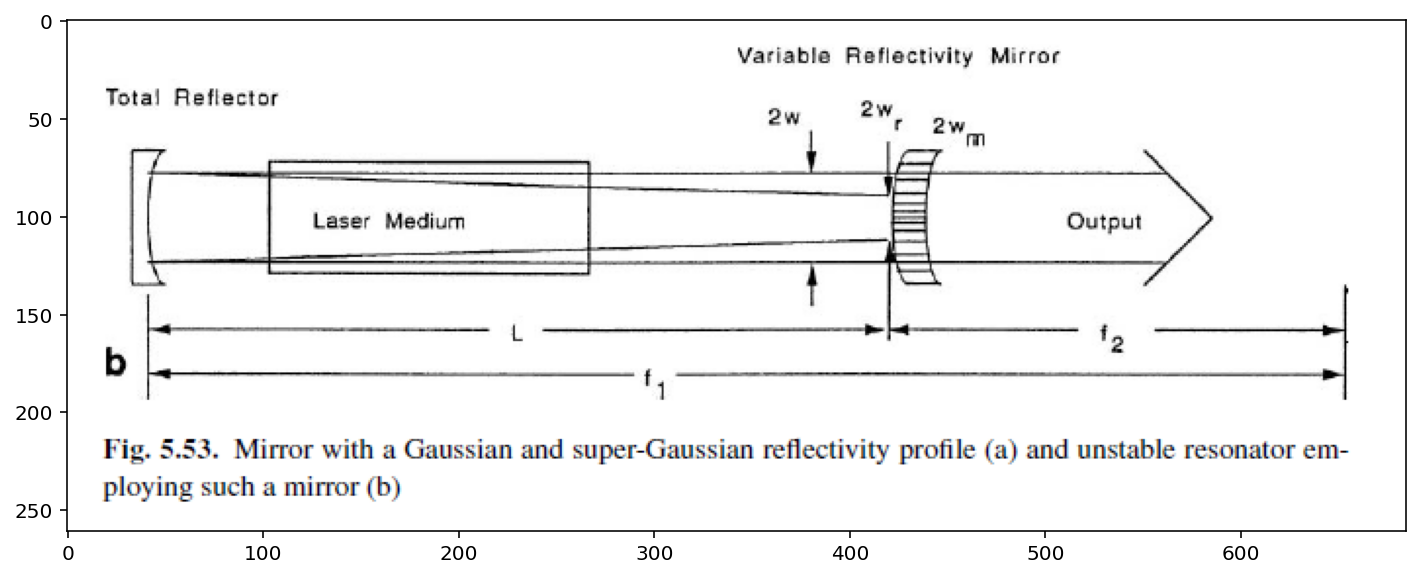

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageChops

# From Koechner, sec. 5.5
img1 = Image.open(r"GRMs.png")
plt.imshow(img1)

In [ ]:
# NdYAG properties

# index, 1% at.wt.
nYAG = 1.8197

# length of slab
l = 42                   # millimeters
s = 3.5

In [ ]:
# CN+ resonator properties

# resonator length
L = 321.25               # millimeters

# HR ROC
R1 = 1400                # millimeters

In [ ]:
# Custom GRM specs
R0 = 0.4
wM = 1.15                 # millimeters
N = 6
R2 = 1000                # millimeters

In [ ]:
# GRM Eqns.

# Bean dia. at HR (need to measure, just a guess for now)
D0 = 4
D = 2 * 1.15

m = D0 / D
print(m)

1.7391304347826089


In [ ]:
print(R1 + R2)
print(2*L)

2400
642.5


Comment:

2L  $\neq$ R1 \+ R2


To do:

- Determine beam size at porro and at HR

